In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objects as go


In [11]:
df = pd.read_csv("../data/global-data-on-sustainable-energy.csv")
df.head()

Entity  Year  Access to electricity (% of population)  \
0  Afghanistan  2000                                 1.613591   
1  Afghanistan  2001                                 4.074574   
2  Afghanistan  2002                                 9.409158   
3  Afghanistan  2003                                14.738506   
4  Afghanistan  2004                                20.064968   

   Access to clean fuels for cooking  \
0                                6.2   
1                                7.2   
2                                8.2   
3                                9.5   
4                               10.9   

   Renewable-electricity-generating-capacity-per-capita  \
0                                               9.22      
1                                               8.86      
2                                               8.47      
3                                               8.09      
4                                               7.75      

   Financial flows to developing countries (US $)  \
0                                         20000.0   
1                                        130000.0   
2                                       3950000.0   
3                                      25970000.0   
4                                             NaN   

   Renewable energy share in the total final energy consumption (%)  \
0                                              44.99                  
1                                              45.60                  
2                                              37.83                  
3                                              36.66                  
4                                              44.24                  

   Electricity from fossil fuels (TWh)  Electricity from nuclear (TWh)  \
0                                 0.16                             0.0   
1                                 0.09                             0.0   
2                                 0.13                             0.0   
3                                 0.31                             0.0   
4                                 0.33                             0.0   

   Electricity from renewables (TWh)  ...  \
0                               0.31  ...   
1                               0.50  ...   
2                               0.56  ...   
3                               0.63  ...   
4                               0.56  ...   

   Primary energy consumption per capita (kWh/person)  \
0                                          302.59482    
1                                          236.89185    
2                                          210.86215    
3                                          229.96822    
4                                          204.23125    

   Energy intensity level of primary energy (MJ/$2017 PPP GDP)  \
0                                               1.64             
1                                               1.74             
2                                               1.40             
3                                               1.40             
4                                               1.20             

   Value_co2_emissions_kt_by_country  \
0                         760.000000   
1                         730.000000   
2                        1029.999971   
3                        1220.000029   
4                        1029.999971   

   Renewables (% equivalent primary energy)  gdp_growth  gdp_per_capita  \
0                                       NaN         NaN             NaN   
1                                       NaN         NaN             NaN   
2                                       NaN         NaN      179.426579   
3                                       NaN    8.832278      190.683814   
4                                       NaN    1.414118      211.382074   

   Density\n(P/Km2) Land Area(Km2)  Latitude  Longitude  
0                60       652230.0  33.93911  67.709953  
1          

In [12]:
print(df['Primary energy consumption per capita (kWh/person)'])

0        302.59482
1        236.89185
2        210.86215
3        229.96822
4        204.23125
           ...    
3644    3227.68020
3645    3068.01150
3646    3441.98580
3647    3003.65530
3648    2680.13180
Name: Primary energy consumption per capita (kWh/person), Length: 3649, dtype: float64


In [13]:
df.drop_duplicates()
df.shape

(3649, 21)

In [14]:
df.columns

Index(['Entity', 'Year', 'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable-electricity-generating-capacity-per-capita',
       'Financial flows to developing countries (US $)',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'Value_co2_emissions_kt_by_country',
       'Renewables (% equivalent primary energy)', 'gdp_growth',
       'gdp_per_capita', 'Density\n(P/Km2)', 'Land Area(Km2)', 'Latitude',
       'Longitude'],
      dtype='object')

In [15]:
print(df.isnull().sum())


Entity                                                                 0
Year                                                                   0
Access to electricity (% of population)                               10
Access to clean fuels for cooking                                    169
Renewable-electricity-generating-capacity-per-capita                 931
Financial flows to developing countries (US $)                      2089
Renewable energy share in the total final energy consumption (%)     194
Electricity from fossil fuels (TWh)                                   21
Electricity from nuclear (TWh)                                       126
Electricity from renewables (TWh)                                     21
Low-carbon electricity (% electricity)                                42
Primary energy consumption per capita (kWh/person)                     0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          207
Value_co2_emissions_kt_by_country                  

In [16]:
df.drop(columns=['Financial flows to developing countries (US $)', 'Renewables (% equivalent primary energy)',
                 'Renewable-electricity-generating-capacity-per-capita', 'Value_co2_emissions_kt_by_country'], inplace=True)


In [17]:
def convert_column_to_float(df, column_name):
    try:
        df[column_name] = df[column_name].str.replace(',', '.').astype(float)
    except ValueError:
        print(f"mauvais format avec {column_name}")
    return df
df = convert_column_to_float(df,"Density\\n(P/Km2)")

In [18]:
columns_to_fill_mean = ['Access to clean fuels for cooking', 'Renewable energy share in the total final energy consumption (%)',
                        'Electricity from nuclear (TWh)', 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)', 'gdp_growth', 'gdp_per_capita', 'Access to electricity (% of population)', 'Electricity from fossil fuels (TWh)', 'Electricity from renewables (TWh)', 'Low-carbon electricity (% electricity)',  'Land Area(Km2)', 'Latitude', 'Longitude', "Density\\n(P/Km2)" ]
df[columns_to_fill_mean] =  df[columns_to_fill_mean].fillna(method='bfill')


In [19]:
print(df.isnull().sum())


Entity                                                              0
Year                                                                0
Access to electricity (% of population)                             0
Access to clean fuels for cooking                                   0
Renewable energy share in the total final energy consumption (%)    0
Electricity from fossil fuels (TWh)                                 0
Electricity from nuclear (TWh)                                      0
Electricity from renewables (TWh)                                   0
Low-carbon electricity (% electricity)                              0
Primary energy consumption per capita (kWh/person)                  0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         0
gdp_growth                                                          0
gdp_per_capita                                                      0
Density\n(P/Km2)                                                    0
Land Area(Km2)      

In [35]:
from sklearn.preprocessing import MinMaxScaler
    
columns_to_normalize = [
    'Access to clean fuels for cooking',
    'Renewable energy share in the total final energy consumption (%)',
    'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
    'Electricity from renewables (TWh)',
    'Primary energy consumption per capita (kWh/person)', # Corrigé ici
    'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
    'gdp_growth', 'gdp_per_capita', 
    "Density\\n(P/Km2)"
]

scaler = MinMaxScaler()

# Application de la normalisation Min-Max aux colonnes sélectionnées
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

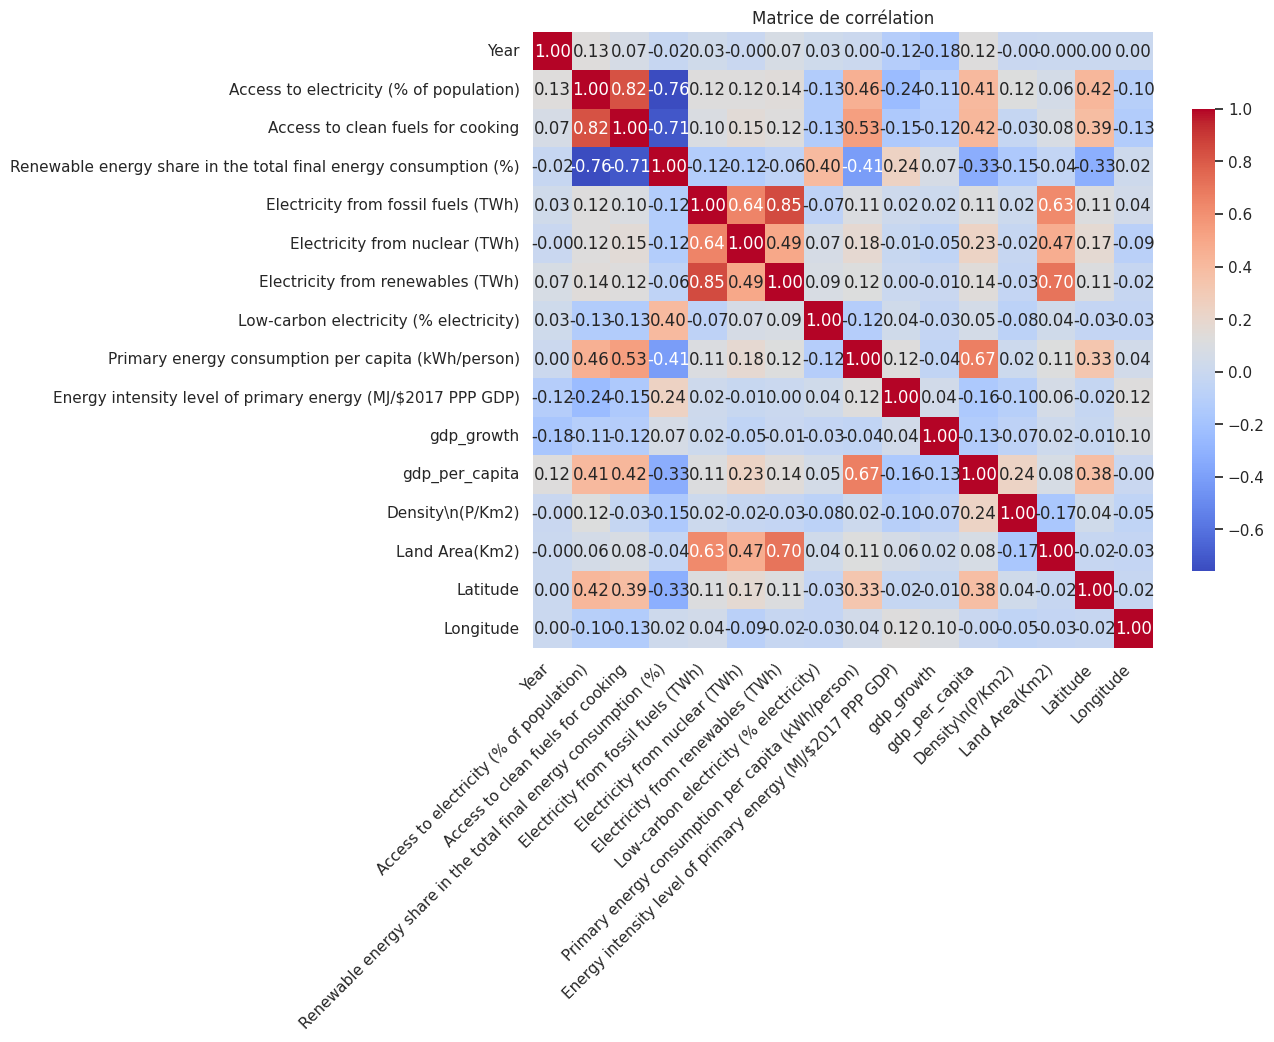

In [28]:
def show_correlation_matrix(dataframe):
    num_df = dataframe.select_dtypes(include=[np.number])
    
    corr = num_df.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm',
                xticklabels=corr.columns, yticklabels=corr.columns,
                cbar_kws={"shrink": .75})

    plt.xticks(rotation=45, ha='right')
    plt.title('Matrice de corrélation')
    plt.show()

show_correlation_matrix(df)

Visiblement la colonne "Access to clean fuels for cooking" ne présente pas un grand intérêt"

In [21]:
def plot_world_map_with_slider(column_name):
    fig = go.Figure()
    for year in range(2000, 2021):
        filtered_df = df[df['Year'] == year]
        trace = go.Choropleth(
            locations=filtered_df['Entity'],
            z=filtered_df[column_name],
            locationmode='country names',
            colorscale='Electric',
            colorbar=dict(title=column_name),
            zmin=df[column_name].min(),
            zmax=df[column_name].max(),
            visible=False
        )
        fig.add_trace(trace)

    fig.data[0].visible = True
    steps = []
    for i in range(len(fig.data)):
        step = dict(
            method='update',
            args=[{'visible': [False] * len(fig.data)},
                  {'title_text': f'{column_name} Map - {2000 + i}', 'frame': {'duration': 1000, 'redraw': True}}],
            label=str(2000 + i)
        )
        step['args'][0]['visible'][i] = True
        steps.append(step)

    sliders = [dict(
        active=0,
        steps=steps,
        currentvalue={"prefix": "Year: ", "font": {"size": 14}},
    )]

    fig.update_layout(
        title_text=f'{column_name} Map with slider',
        title_font_size=24,
        title_x=0.5,
        geo=dict(
            showframe=True,
            showcoastlines=True,
            projection_type='natural earth'
        ),
        sliders=sliders,
        height=500,
        width=1000,
        font=dict(family='Arial', size=12),
        margin=dict(t=80, l=50, r=50, b=50),
    )
    fig.show()

column_name = 'Access to electricity (% of population)'
plot_world_map_with_slider(column_name)
column_name = 'Renewable energy share in the total final energy consumption (%)'
plot_world_map_with_slider(column_name)

Ce n'est pas moi qui ait fait ce slider, toutefois j'ai choisi de l'incorporer à mon travail car je considérais qu'il apportait une réelle valeur ajoutée à la compréhension du dataset.

In [22]:
def display_outliers(df):
    outliers_info = {}

    for column_name in df.columns:
        if df[column_name].dtype in ['int64', 'float64']:  # Traitement uniquement des colonnes numériques
            q1 = df[column_name].quantile(0.25)
            q3 = df[column_name].quantile(0.75)
            iqr = q3 - q1

            lower_bound = q1 - (1.5 * iqr)
            upper_bound = q3 + (1.5 * iqr)

            condition = (df[column_name] < lower_bound) | (df[column_name] > upper_bound)
            outliers = df[condition]
            outliers_info[column_name] = {'Indices': outliers.index.tolist(), 'Values': outliers[column_name].tolist()}

    for column, info in outliers_info.items():
        print(f"Valeurs aberrantes pour la colonne '{column}':")
        print("Indices:", info['Indices'])
        print("Valeurs:", info['Values'], "\n")
        
display_outliers(df)

Valeurs aberrantes pour la colonne 'Year':
Indices: []
Valeurs: [] 

Valeurs aberrantes pour la colonne 'Access to electricity (% of population)':
Indices: []
Valeurs: [] 

Valeurs aberrantes pour la colonne 'Access to clean fuels for cooking':
Indices: []
Valeurs: [] 

Valeurs aberrantes pour la colonne 'Renewable energy share in the total final energy consumption (%)':
Indices: []
Valeurs: [] 

Valeurs aberrantes pour la colonne 'Electricity from fossil fuels (TWh)':
Indices: [58, 59, 60, 61, 62, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 290, 291, 292, 293, 495, 496, 497, 498, 499, 500, 501, 502, 503, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 714, 715, 716, 717, 718, 719, 720, 721, 722, 723, 724, 725, 726, 727, 728, 729, 730, 731, 732, 733, 734, 1010, 1011, 1012, 1013, 1014, 1015, 1016, 1017

On constate énormément de valeurs considérées comme Aberrante, vu la quantité de données, j'ai choisi de ne pas les enlever

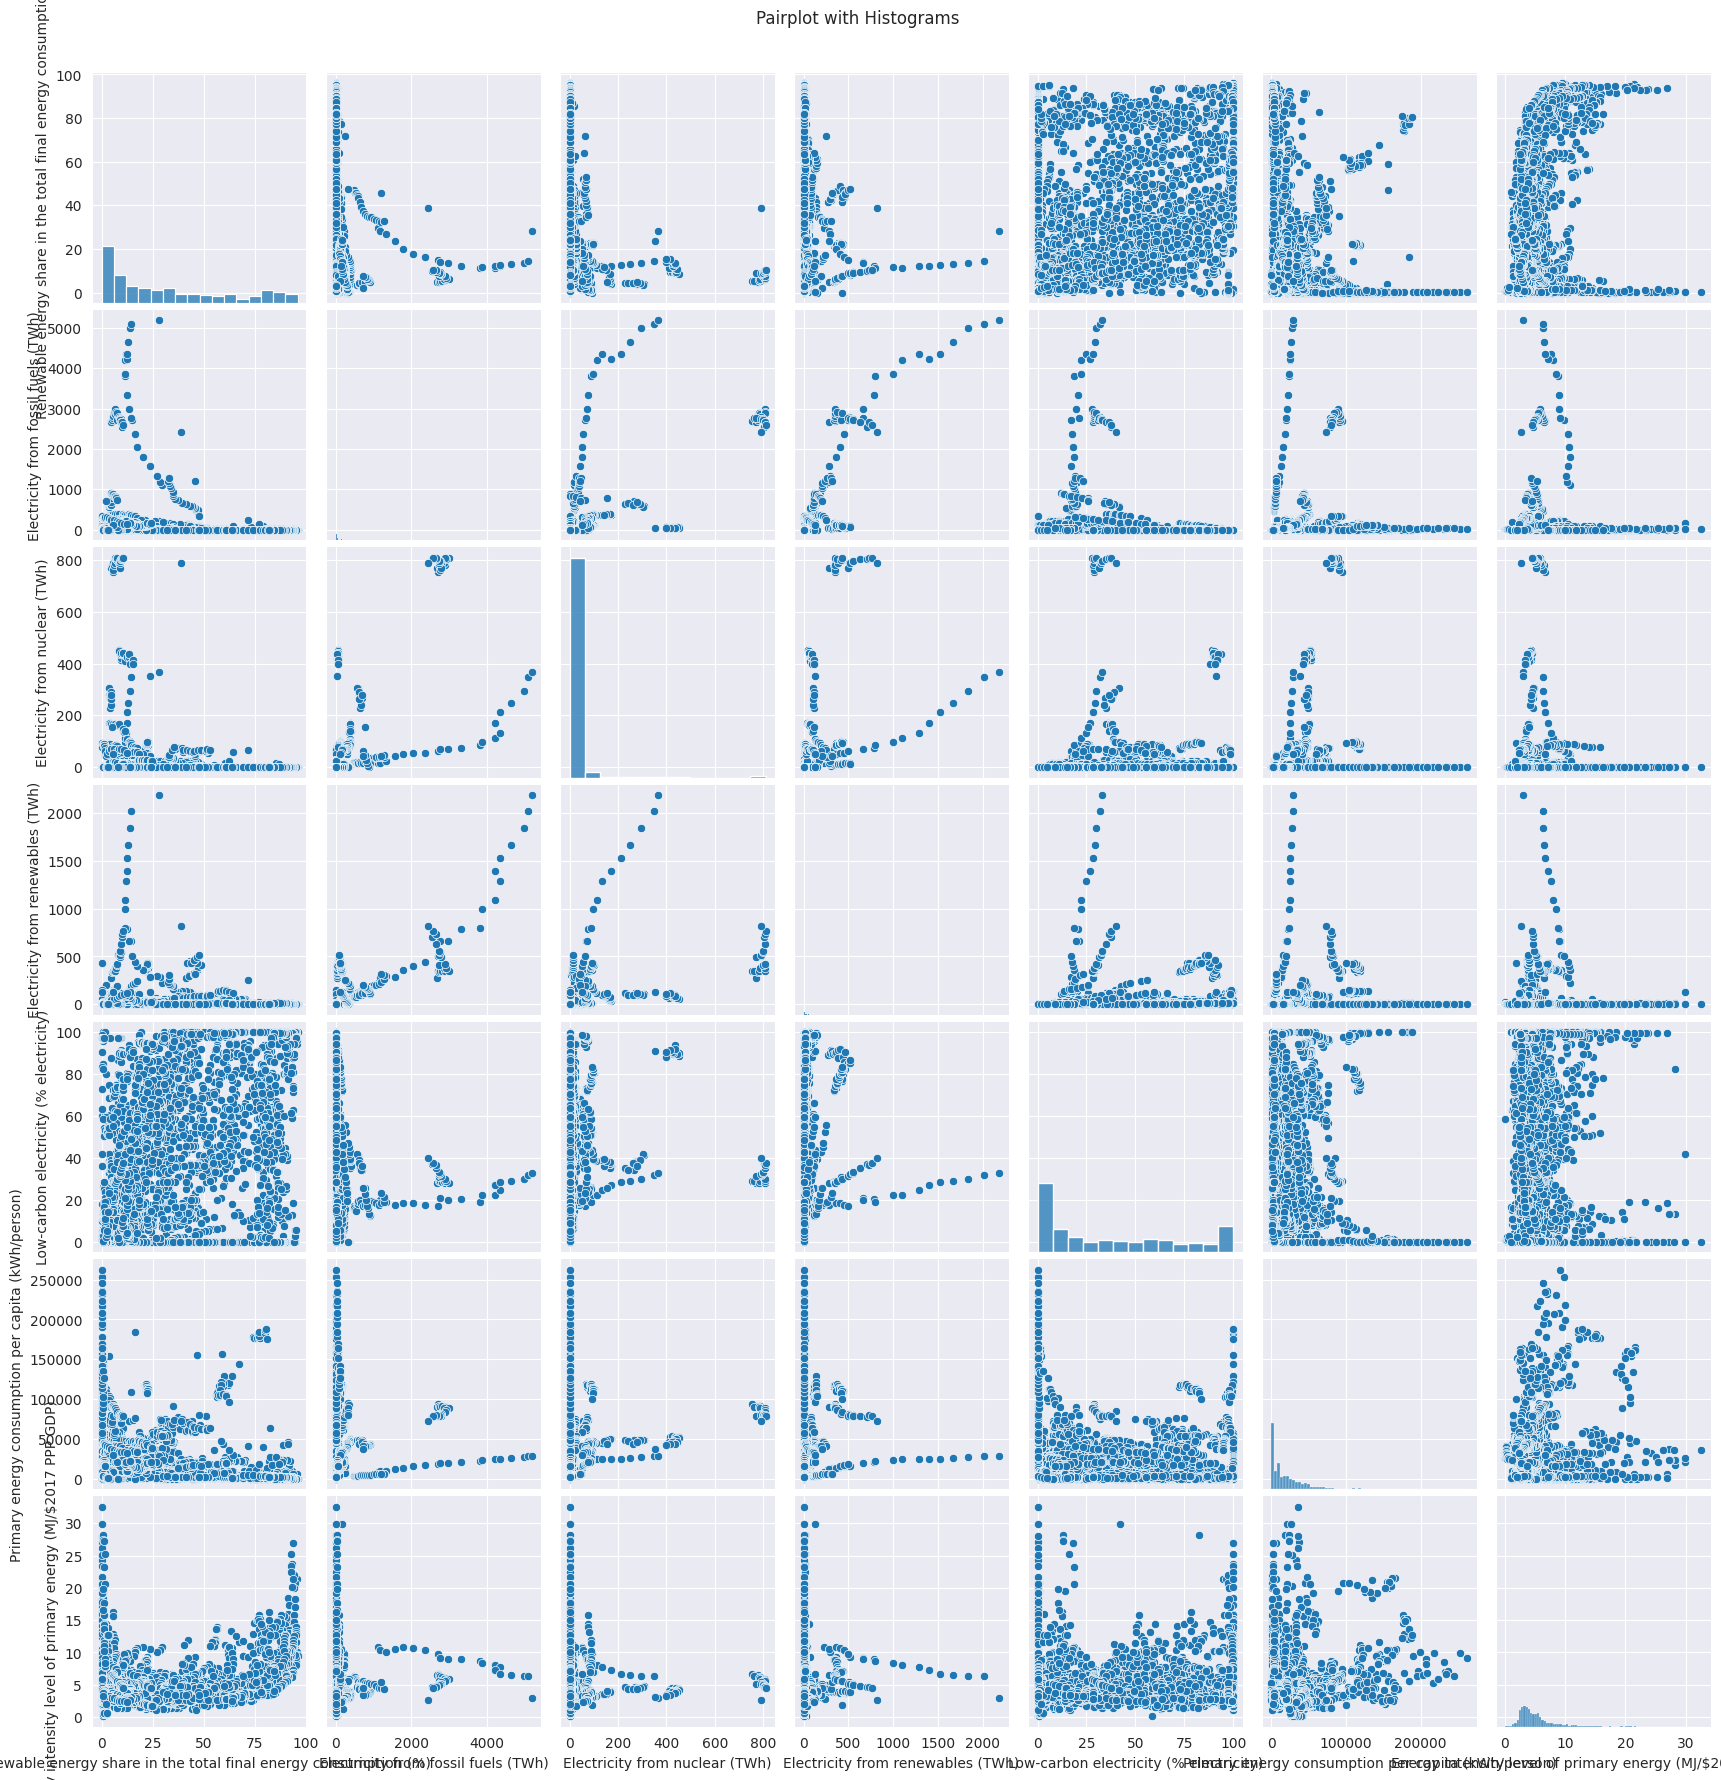

In [23]:
plt.show()
columns_of_interest = [

"Renewable energy share in the total final energy consumption (%)",
"Electricity from fossil fuels (TWh)",
"Electricity from nuclear (TWh)",
"Electricity from renewables (TWh)",
"Low-carbon electricity (% electricity)",
"Primary energy consumption per capita (kWh/person)",
"Energy intensity level of primary energy (MJ/$2017 PPP GDP)"
]
df_selected = df[columns_of_interest]

pairplot_fig = sns.pairplot(df_selected, diag_kind='hist')

pairplot_fig.fig.suptitle("Pairplot with Histograms ", y=1.02)

plt.show()

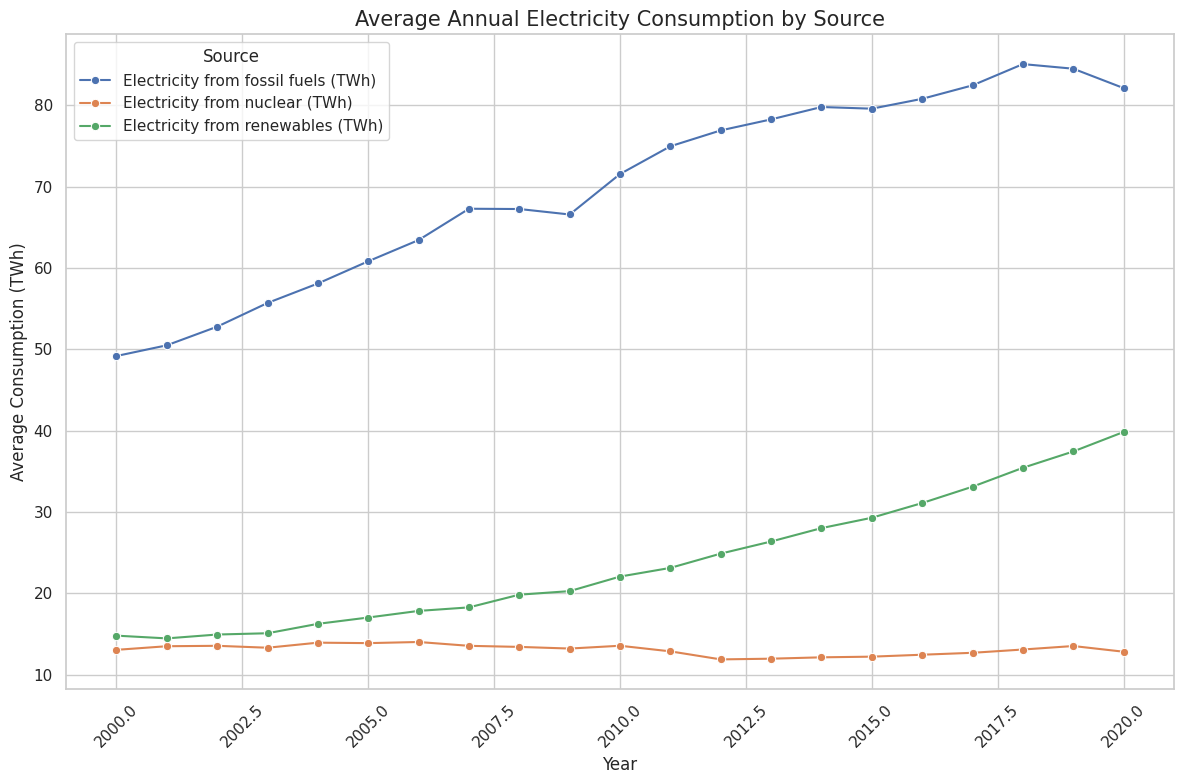

In [24]:
df_grouped = df.groupby('Year')[['Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)', 'Electricity from renewables (TWh)']].mean().reset_index()

df_long = pd.melt(df_grouped, id_vars=['Year'], value_vars=['Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)', 'Electricity from renewables (TWh)'], var_name='Source', value_name='Consumption')

sns.set(style="whitegrid")

plt.figure(figsize=(12, 8)) 
graph = sns.lineplot(x='Year', y='Consumption', hue='Source', data=df_long, marker="o")

graph.set_title('Average Annual Electricity Consumption by Source', fontsize=15)  
graph.set_xlabel('Year', fontsize=12) 
graph.set_ylabel('Average Consumption (TWh)', fontsize=12)  
plt.xticks(rotation=45)  
plt.legend(title='Source') 


plt.tight_layout()  
plt.show()